# Exploratory: 

### *How the **salary** for the **same position** differs from **city** to another*? 

In [133]:
# !pip install seaborn

In [134]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
warnings.filterwarnings("ignore")
from  utils import  german_cities 
POSITION="Position "
SALARY="Yearly brutto salary (without bonus and stocks) in EUR"
CITY='City'
df_2020 = pd.read_csv('./Dataset/2020.csv')

In [135]:
def clean_cities(df):
    '''
    - Remove the cities that are out of Germany sice Germany represents  1139 out of 1247  rows 
    - German alone has 60 non unique / not cleaned Cities out of 119
    - Then after concentrating only on the german cities, some unification on the names of cities are done
    - The cities which has row count < threshold (10) has been removed 
    '''

    df_2020_cleaned = df[df[CITY].isin(german_cities)]
    # Remove the leading & trailing spaces and unify the names
    df_2020_cleaned[CITY]=df_2020_cleaned[CITY].str.strip()\
        .str.replace('Dusseldurf', 'Düsseldorf')\
        .str.replace('Duesseldorf','Düsseldorf')\
        .str.replace('Dusseldorf','Düsseldorf')
    
    value_counts=df_2020_cleaned[CITY].value_counts()
    mask = df_2020_cleaned[CITY].isin(value_counts.index[value_counts < 10])
    df_2020_cleaned = df_2020_cleaned.loc[~mask]  
    return df_2020_cleaned

In [136]:
def clean_position(df):
    df[POSITION]=df[POSITION].str.strip().str.lower()
    df[POSITION]=df[POSITION]\
    .str.replace('devops manager','DevOps')\
    .str.replace('cloud engineer','DevOps')\
    .str.replace('cloud architect','DevOps')\
    .str.replace('sre','DevOps')\
    .str.replace('devops','DevOps')\
    .str.replace('bi consultant sap/ data engineer','Data Scientist')\
    .str.replace('db developer/data analyst','Data Scientist')\
    .str.replace('big data engineer','Data Scientist')\
    .str.replace('bi developer / data engineer','Data Scientist')\
    .str.replace('head of bi','Data Scientist')\
    .str.replace('bi developer / data scientist','Data Scientist')\
    .str.replace('senior data engineer','Data Scientist')\
    .str.replace('bi consultant','Data Scientist')\
    .str.replace('bi it consultant','Data Scientist')\
    .str.replace('bi analyst','Data Scientist')\
    .str.replace('analytics engineer','Data Scientist')\
    .str.replace('data analyst','Data Scientist')\
    .str.replace('dana analyst','Data Scientist')\
    .str.replace('data architect','Data Scientist')\
    .str.replace('product analyst','Data Scientist')\
    .str.replace('researcher/ consumer insights analyst','Data Scientist')\
    .str.replace('data scientist','Data Scientist')\
    .str.replace('data engineer','Data Scientist')\
    .str.replace('working student (qa)','Software Testing')\
    .str.replace('qa engineer','Software Testing')\
    .str.replace('test manager','Software Testing')\
    .str.replace('software developer in test','Software Testing')\
    .str.replace('qa manager','Software Testing')\
    .str.replace('qa automation engineer','Software Testing')\
    .str.replace('qa lead','Software Testing')\
    .str.replace('qa manager','Software Testing')\
    .str.replace('software tester','Software Testing')\
    .str.replace('testmanager','Software Testing')\
    .str.replace('embedded software engineer','Software Engineer')\
    .str.replace('fullstack developer','Software Engineer')\
    .str.replace('full-stack developer','Software Engineer')\
    .str.replace('staff engineer','Software Engineer')\
    .str.replace('fullstack engineer, ну или software engineer','Software Engineer')\
    .str.replace('software architekt','Software Engineer')\
    .str.replace('software architect','Software Engineer')\
    .str.replace('sw architect','Software Engineer')\
    .str.replace('tech lead / full-stack','Software Engineer')\
    .str.replace('tech lead','Software Engineer')\
    .str.replace('tech leader','Software Engineer')\
    .str.replace('sap developer','Software Engineer')\
    .str.replace('sap consultant','Software Engineer')\
    .str.replace('lead software developer','Software Engineer')\
    .str.replace('lead developer','Software Engineer')\
    .str.replace('software engineer','Software Engineer')\
    .str.replace('it operations manager','IT')\
    .str.replace('head of it','IT')\
    .str.replace('it consulting','IT')\
    .str.replace('it manager','IT')\
    .str.replace('it spezialist','IT')\
    .str.replace('erp consultant','IT')\
    .str.replace('mobile developer','Mobile Developer')\
    .str.replace('ios developer','Mobile Developer')\
    .str.replace('technical account manager','Product Manager')\
    .str.replace('technical project manager','Product Manager')\
    .str.replace('technical business analyst','Product Manager')\
    .str.replace('project manager','Product Manager')\
    .str.replace('business analyst','Product Manager')\
    .str.replace('engineering team lead','Product Manager')\
    .str.replace('product manager','Product Manager')\
    .str.replace('backend developer','Backend Developer')\
    .str.replace('frontend developer','Frontend Developer')\
    .str.replace('designer (ui/ux)','Designer (UI/UX)')\
    .str.replace('ml engineer','ML Engineer')


    vc= df[POSITION].value_counts()
    mask =df[POSITION].isin(vc.index[vc < 5])
    df.loc[mask, POSITION] = 'Other'
    return df


In [137]:
def remove_outliers(df,column):
    # Calculate the IQR for the salary column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define a multiplier (e.g., 1.5) to determine outliers
    multiplier = 1.5
    
    # Filter out rows where the salary is outside the IQR range
    df_without_outliers = df[(df[column] >= Q1 - multiplier * IQR) & (df[column] <= Q3 + multiplier * IQR)]
    
    return df_without_outliers

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram(column,df,label='Categories'):
    counts = df[column].value_counts()
    # Plot the histogram
    sns.countplot(data=df, x=column, order=counts.index)

    # Set labels
    plt.xlabel(label)
    plt.ylabel('Count')
    plt.title('Histogram')

    # Rotate x-axis labels if needed
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()


def plot_box_plot(df,x_col,y_col,x_label,y_label,title):
    # Plot the box plot
    plt.figure(figsize=(8,8))
    sns.boxplot(data=df, x=x_col, y=y_col)
    # Set labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    # Rotate x-axis labels if needed
    plt.xticks(rotation=90)
    # Display the plot
    plt.show()


def plot_heatmap(df,x,y,value,title,x_label,y_label,aggfunc='mean'):
    '''
    df: dataframe
    x: first column included in the heatmap  e.g: City
    y: second column included in the heatmap  e.g: Position
    value: the value to be plotted in the heatmap e,g: Salary
    title: the title of the heatmap
    x_label: the label of the x-axis
    y_label: the label of the y-axis     
    '''
    df_cpy=df.copy()
    df_cpy.set_index(y, inplace=True)
   

    heatmap_data = df_cpy.pivot_table(values=value, index=y, columns=x, aggfunc=aggfunc)

    # Plotting the heatmap
    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
    sns.heatmap(heatmap_data, cmap='coolwarm',annot=True, fmt=".2f")  
    plt.title(title)  # Add a title to the plot
    plt.xlabel(x_label)  # Add labels to the x-axis
    plt.ylabel(y_label)  # Add labels to the y-axis
    plt.show()



# First Things First, Lets do some Data Cleaning

### 1. Checking how many Nan we have:

#### Let's consider dropping the null rows for now 

In [139]:
print("Total rows: " ,len(df_2020))
print("For the position in 2020 : " ,df_2020[POSITION].isna().sum())
print("For the Salary in 2020 : " , df_2020[SALARY].isna().sum())
print("For the city in 2020 : " , df_2020[CITY].isna().sum())
print("---------------------------------------")
df_2020_cleaned=df_2020.dropna(subset=[POSITION,CITY,SALARY])
print("Total rows After dropping Nans: " ,len(df_2020_cleaned))


Total rows:  1253
For the position in 2020 :  6
For the Salary in 2020 :  0
For the city in 2020 :  0
---------------------------------------
Total rows After dropping Nans:  1247


### 2.Next, Lets see if there is any inconsistencies in the columns


In [140]:
print("Unique cities before cleaning",len(df_2020_cleaned[CITY].unique()),"with total rows :", len(df_2020_cleaned))
df_2020_cleaned=clean_cities(df_2020_cleaned)
print("Unique cities after cleaning",len(df_2020_cleaned[CITY].unique()),"with total rows :", len(df_2020_cleaned))

Unique cities before cleaning 119 with total rows : 1247
Unique cities after cleaning 7 with total rows : 1063


In [141]:
print("Unique positions before cleaning",len(df_2020[POSITION].unique()),"with total rows :", len(df_2020_cleaned))
df_2020_cleaned=clean_position(df_2020_cleaned)
print("Unique cities after cleaning",len(df_2020_cleaned[POSITION].unique()),"with total rows :", len(df_2020_cleaned))

Unique positions before cleaning 149 with total rows : 1063
Unique cities after cleaning 13 with total rows : 1063


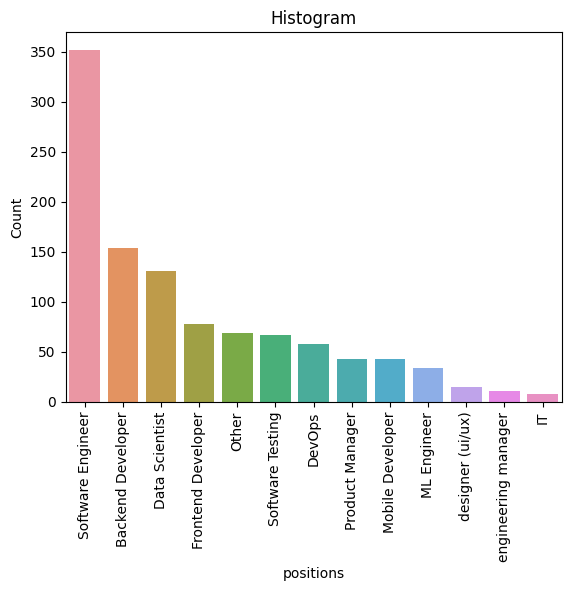

In [142]:
plot_histogram(column=POSITION, df=df_2020_cleaned,label="positions")

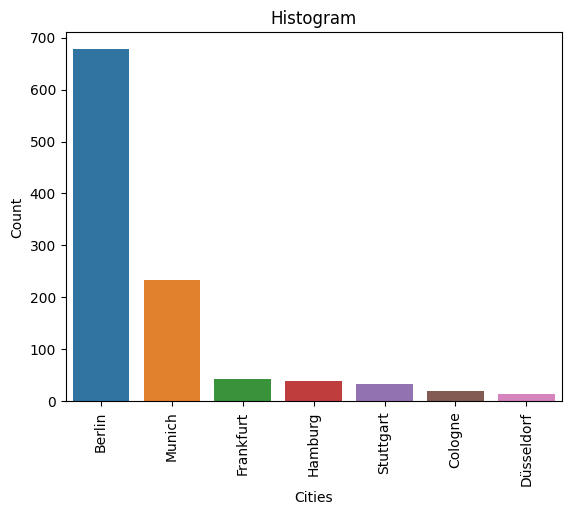

In [143]:
plot_histogram(column=CITY,df=df_2020_cleaned,label='Cities')

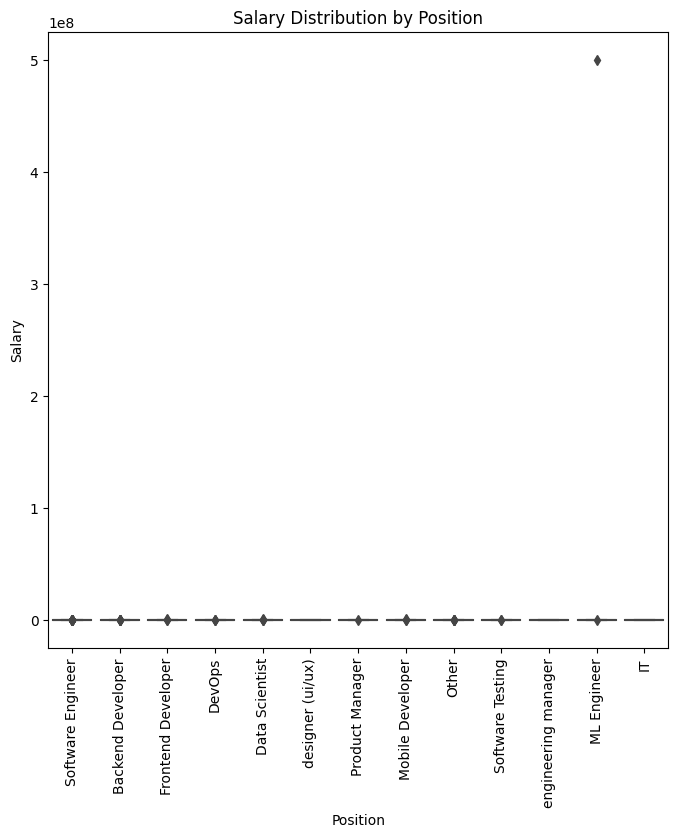

In [144]:
plot_box_plot(df=df_2020_cleaned,x_col=POSITION,
              y_col=SALARY,x_label='Position',y_label='Salary',title='Salary Distribution by Position')

### 3.Remove the outliers


In [145]:
df_2020_cleaned = df_2020_cleaned.groupby(POSITION).apply(remove_outliers, column=SALARY)
print("Total rows After removing outliers: " ,len(df_2020_cleaned))

Total rows After removing outliers:  1013


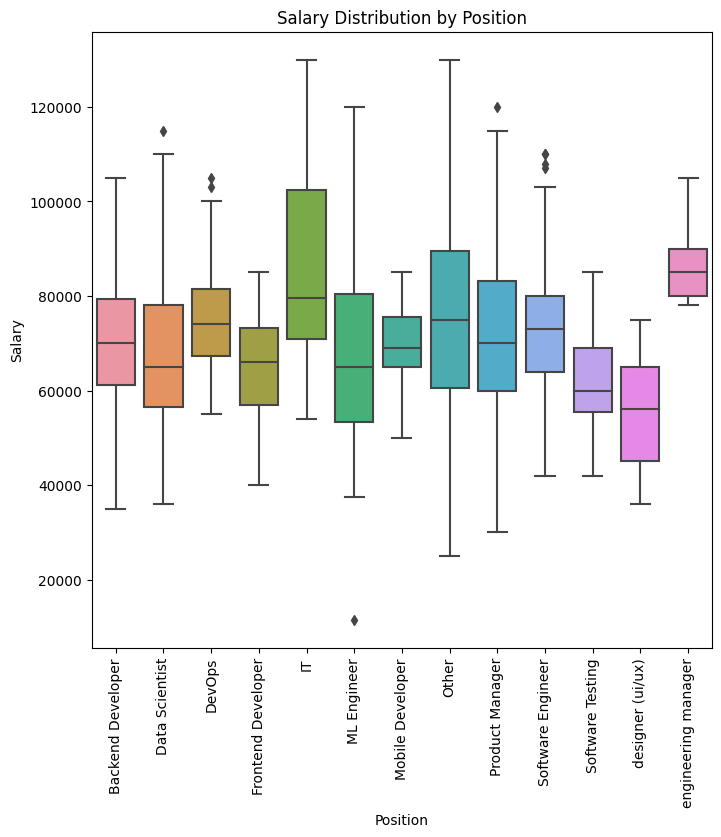

In [146]:
plot_box_plot(df=df_2020_cleaned,x_col=POSITION,
              y_col=SALARY,x_label='Position',y_label='Salary',title='Salary Distribution by Position')

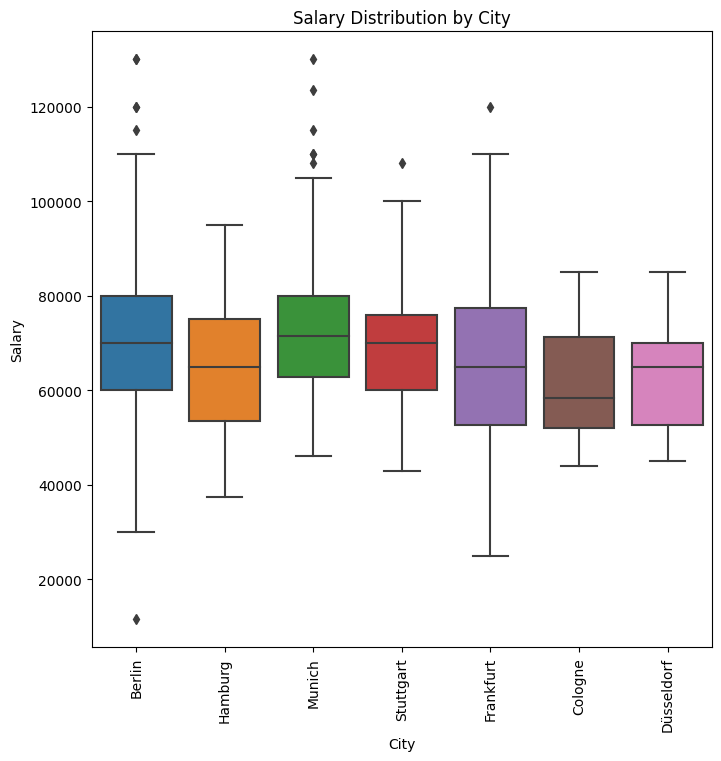

In [147]:
plot_box_plot(df=df_2020_cleaned,x_col=CITY,
              y_col=SALARY,x_label='City',y_label='Salary',title='Salary Distribution by City')

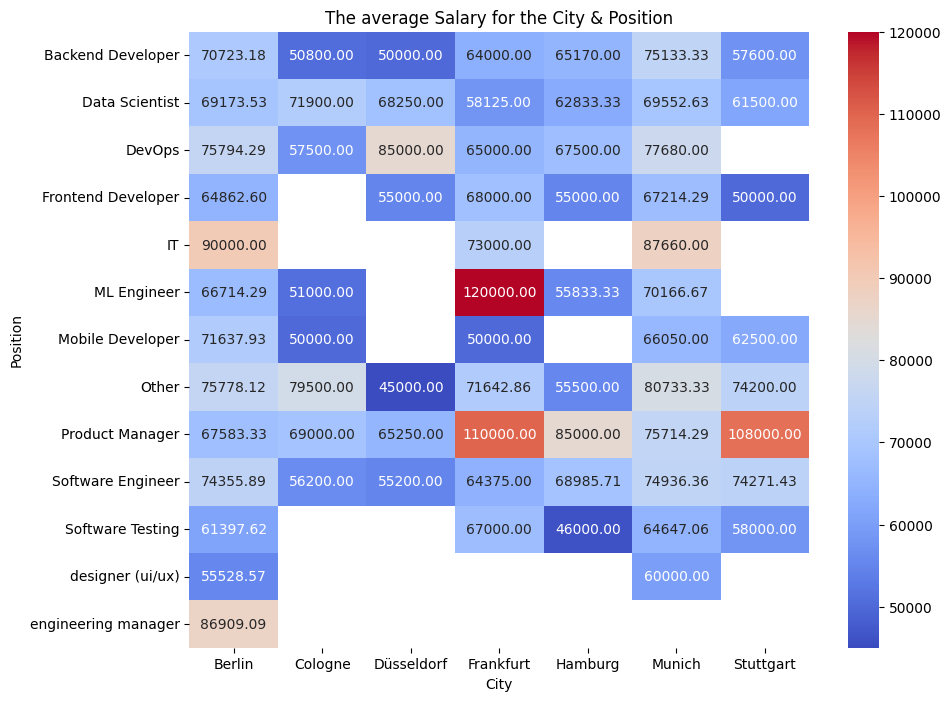

In [148]:
plot_heatmap(df=df_2020_cleaned,x=CITY,y=POSITION,value=SALARY,title="The average Salary for the City & Position",x_label='City',y_label='Position')

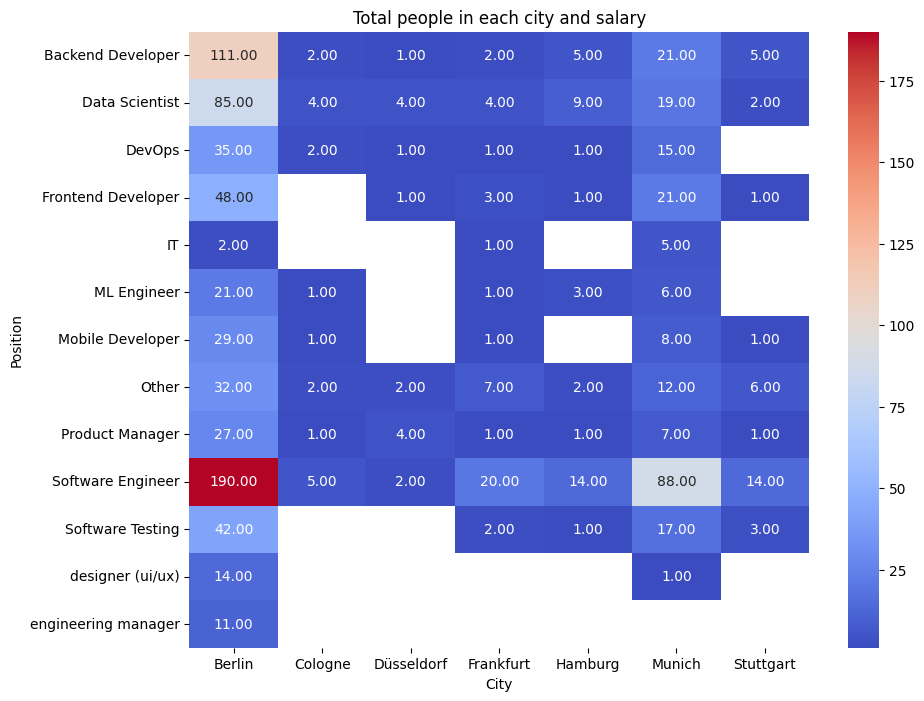

In [149]:
plot_heatmap(df=df_2020_cleaned,x=CITY,y=POSITION,value=SALARY,title="Total people in each city and salary",x_label='City',y_label='Position',aggfunc='count')

# Next , Conduct Statistical Tests

- ANOVA (Analysis of Variance) is a hypothesis testing technique used to determine if there are significant differences between the means of two or more groups. However, ANOVA relies on certain assumptions that need to be satisfied for the results to be valid and reliable. Two key assumptions of ANOVA are:

1. Normality assumption: ANOVA assumes that the data within each group (or category) are normally distributed. This means that the distribution of values for each group follows a bell-shaped curve. Normality is important because ANOVA uses the mean and variance of the data, and these statistics are most accurate when the data are normally distributed.

    1. To validate these assumptions, diagnostic tests are often performed. The Shapiro-Wilk test is a common test used to assess normality. It tests the null hypothesis that the data are normally distributed. If the p-value from the Shapiro-Wilk test is less than a specified significance level (often 0.05), we have evidence to reject the null hypothesis, indicating that the data are not normally distributed.
 

2. Homogeneity of variances assumption: ANOVA assumes that the variances of the data within each group are equal. Homogeneity of variances means that the spread or dispersion of the data points in each group is roughly the same. If the variances are not equal, it can affect the accuracy of the ANOVA results.

    1. Levene's test is another common test used to assess the homogeneity of variances assumption. It tests the null hypothesis that the variances of the data across groups are equal. If the p-value from Levene's test is less than the specified significance level, we have evidence to reject the null hypothesis, indicating that the variances are not equal.

- By performing these diagnostic tests before conducting ANOVA, we can evaluate whether the assumptions of normality and homogeneity of variances are violated. If the assumptions are violated, alternative statistical tests or transformations of the data may be more appropriate.

- It's important to note that violating these assumptions does not necessarily invalidate the ANOVA results, but it can affect the reliability and interpretation of the findings. Therefore, it is recommended to perform these tests and consider their results when applying ANOVA.

[{'City': 'Berlin', 'p-value': 0.02834230475127697}, {'City': 'Cologne', 'p-value': 0.054700545966625214}, {'City': 'Düsseldorf', 'p-value': 0.21999864280223846}, {'City': 'Frankfurt', 'p-value': 0.7982271313667297}, {'City': 'Hamburg', 'p-value': 0.03643213212490082}, {'City': 'Munich', 'p-value': 0.5447331070899963}]
LeveneResult(statistic=1.8997861867201795, pvalue=0.09939747563977269)
Shapiro-Wilk test results:
City: Berlin, p-value: 0.02834230475127697
City: Cologne, p-value: 0.054700545966625214
City: Düsseldorf, p-value: 0.21999864280223846
City: Frankfurt, p-value: 0.7982271313667297
City: Hamburg, p-value: 0.03643213212490082
City: Munich, p-value: 0.5447331070899963
Levene's test p-value: 0.09939747563977269
ANOVA p-value: None
[{'Position': 'Backend Developer', 'Pvalue': 0.013266546183392633}, {'Position': 'Data Scientist', 'Pvalue': 0.7083567271504911}, {'Position': 'DevOps', 'Pvalue': 0.19410859187357166}, {'Position': 'Frontend Developer', 'Pvalue': 0.5056339979332278}, {

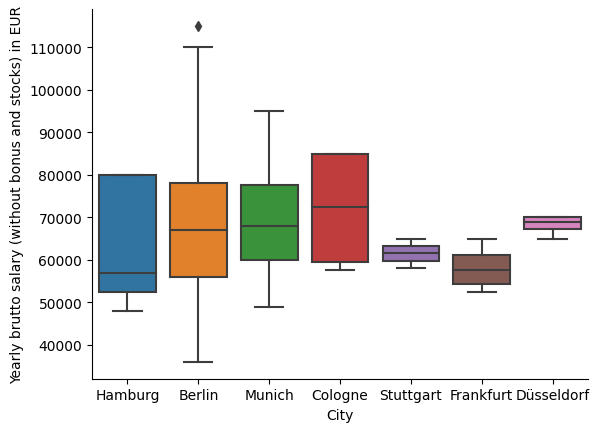

In [150]:
import scipy.stats as stats
import seaborn as sns

# Subset the data for a specific position
position_data = df_2020_cleaned[df_2020_cleaned[POSITION] == 'Data Scientist']

# Perform Shapiro-Wilk test for normality
city_groups = position_data.groupby(CITY)[SALARY]
shapiro_results = []
for city, group in city_groups:
    if len(group) >= 3:  # Exclude cities with fewer than three observations
        _, p_value = stats.shapiro(group)
        shapiro_results.append({'City': city, 'p-value': p_value})


print(shapiro_results)
# Perform Levene's test for homogeneity of variances
valid_city_groups = [group for _, group in city_groups if len(group) >= 3]
levene_result = stats.levene(*valid_city_groups)
print(levene_result)
# # Perform ANOVA if assumptions are satisfied
if all(result['p-value'] > 0.05 for result in shapiro_results) and levene_result.pvalue > 0.05:
    # Perform ANOVA
    result = stats.f_oneway(*valid_city_groups)
    p_value = result.pvalue
else:
    p_value = None


# # Plot diagnostic plots
sns.boxplot(x=CITY, y=SALARY, data=position_data)
sns.despine()

# # Print diagnostic test results
print("Shapiro-Wilk test results:")
for result in shapiro_results:
    print(f"City: {result['City']}, p-value: {result['p-value']}")
print(f"Levene's test p-value: {levene_result.pvalue}")
print(f"ANOVA p-value: {p_value}")

p_values=[]
for position in df_2020_cleaned[POSITION].unique():
    position_data = df_2020_cleaned[df_2020_cleaned[POSITION] == position]
    city_groups = position_data.groupby(CITY)
    
    if len(city_groups) > 1:  # Check if there are at least two groups
        # Perform ANOVA
        result = stats.f_oneway(*[group[SALARY] for _, group in city_groups])
        p_value = result.pvalue
        p_values.append({'Position': position, "Pvalue":p_value})
    

print(p_values)


Interpret the Results: Analyze the p-value obtained from the ANOVA test. If the p-value is below a predetermined significance level (e.g., 0.05), it suggests that there are significant differences in salaries among the cities for the given position. Conversely, if the p-value is above the significance level, there is no significant evidence to reject the null hypothesis, indicating that the salary differences may not be significant.

## ANOTHER TESTS RATHER THAN ANOVA:

If you want to explore the relationship between salary and city for different positions without relying on the assumptions of normality and homogeneity of variances, you can consider non-parametric tests. Non-parametric tests are distribution-free and do not assume any specific distribution of the data. Here are a few non-parametric tests that you can perform:

1. Kruskal-Wallis test: This test is a non-parametric alternative to ANOVA and can be used when you have one categorical independent variable (city) and one continuous dependent variable (salary). It tests whether the distributions of salaries across different cities are statistically significantly different.

2. Mann-Whitney U test: This test compares the medians of two independent groups (e.g., salary in two different cities) and can be used to determine if there is a statistically significant difference in salary between two specific cities.

3. Wilcoxon signed-rank test: This test compares the medians of paired samples (e.g., salary for the same position in different cities) and can be used when you have paired data or repeated measures.

These non-parametric tests are robust to violations of normality and do not assume equal variances. They provide a way to assess the statistical significance of differences in salary across cities or between specific city pairs without requiring the assumptions associated with ANOVA.

It's important to note that non-parametric tests may have less statistical power compared to parametric tests (like ANOVA) when the assumptions are met. However, they can still provide valuable insights and make fewer assumptions about the underlying data distribution.